In [1]:
!pip install geopandas matplotlib pandas tabulate


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Path and Imports

In [2]:
# =============================================================================
# 1. IMPORT LIBRARIES
# =============================================================================
# Think of this section as gathering your tools before starting a project.
# We're importing pre-written code from different "libraries" to help us.

# 'geopandas' is the star player for working with geographic data in Python.
# It lets us open files like shapefiles (.shp) and treat them like data tables.
# We give it a nickname 'gpd' to type less later.
import geopandas as gpd

# 'matplotlib.pyplot' is the most common library for making plots and charts.
# We'll use it to create our map visualization.
# Its standard nickname is 'plt'.
import matplotlib.pyplot as plt

# 'pandas' is the foundation that geopandas is built on. It's the essential
# tool for any kind of data manipulation in Python (like spreadsheets, but in code).
# We give it the nickname 'pd'.
import pandas as pd

# This line imports a specific tool, 'ScaleBar', from a library that adds
# map-making elements to matplotlib. As the name suggests, it creates a scale bar.
from matplotlib_scalebar.scalebar import ScaleBar


# =============================================================================
# 2. CONFIGURE PANDAS SETTINGS
# =============================================================================
# These lines adjust some default behaviors of the pandas library.

# By default, if your data table has many columns, pandas will hide some
# when you print it out. This line tells pandas: "don't hide anything,
# always show me all the columns."
pd.set_option('display.max_columns', None)

# This line disables a common but sometimes confusing warning called
# 'SettingWithCopyWarning'. While it's good to learn about this warning later,
# turning it off can make the code less noisy for beginners.
pd.options.mode.chained_assignment = None


# =============================================================================
# 3. DEFINE FILE PATHS
# =============================================================================
# Here, we're creating variables to hold the locations of our data files.

# A "path" is like a street address for a file on your computer.
# The 'r' before the string (e.g., r"C:\...") stands for "raw string".
# It tells Python to treat backslashes as normal characters, which is very
# important for file paths on Windows.

# This path points to a shapefile containing road data.
path = r"C:\Users\colto\Downloads\UtahRoads_-3674006339973818616\Roads.shp"
# This path points to a shapefile containing flood data for the Great Salt Lake.
path2 = r"C:\Users\colto\Downloads\GSLFlooding_-4319570120752989084\GSLFlooding.shp"


# =============================================================================
# 4. HELPER FUNCTION: NORTH ARROW
# =============================================================================
# Since matplotlib doesn't have a built-in function for a simple north arrow,
# we define our own! A "function" is a reusable block of code that performs
# a specific task.

def add_north_arrow(ax, x=0.9, y=0.9, size=0.05):
    """
    Adds a north arrow to a matplotlib map plot.

    Args:
        ax (matplotlib.axes.Axes): The axes object of the plot where the arrow
                                   will be drawn. This is basically the canvas
                                   of our map.
        x (float, optional): The horizontal position of the arrow, as a
                             fraction of the plot's width (0=left, 1=right).
                             Defaults to 0.9 (90% to the right).
        y (float, optional): The vertical position of the arrow, as a fraction
                             of the plot's height (0=bottom, 1=top).
                             Defaults to 0.9 (90% to the top).
        size (float, optional): The length of the arrow, as a fraction of the
                                plot's height. Defaults to 0.05 (5% of the height).
    """
    # The 'annotate' method is used to add text and arrows to a plot.
    # We're adding the letter 'N' to our map's axes ('ax').
    ax.annotate(
        'N',  # The text to display (for "North").
        xy=(x, y),  # The position for the tip of the arrow.
        xytext=(x, y - size),  # The position for the text 'N'.
        arrowprops=dict(arrowstyle='->', lw=2, color='black'), # Defines arrow style.
        fontsize=14,  # Sets the size of the 'N'.
        fontweight='bold',  # Makes the 'N' bold.
        ha='center',  # Horizontally aligns the text to the center.
        # This is the most important part! It tells matplotlib to place the
        # arrow based on the plot's frame (0,0 is bottom-left corner, 1,1 is
        # top-right), not the actual geographic coordinates of the data.
        xycoords='axes fraction'
    )


# =============================================================================
# 5. HELPER VARIABLE: CUSTOM COLORS
# =============================================================================
# A "list" is just a collection of items. This list holds color codes.

# This is a list of "hex color codes" specifically chosen to be easily
# distinguishable by people with common forms of color blindness.
# Using accessible colors is a great practice in data visualization to ensure
# your maps and charts can be understood by the widest possible audience.
# Note: Avoid yellow lines on a white background and dark blue lines on a black background
colorblind_friendly_colors = [
    "#000000",  # Black
    "#FFFFFF",  # White
    "#0173B2",  # Strong blue
    "#DE8F05",  # Orange
    "#CC78BC",  # Pink/magenta
    "#029E73",  # Teal green
    "#FBAFE4",  # Light pink
    "#949494",  # Medium gray
    "#56B4E9",  # Sky blue
    "#E69F00",  # Amber/golden
    "#F0E442",  # Bright yellow
    "#D55E00",  # Vermillion/red-orange
    "#A0522D",  # Sienna brown
    "#800080",  # Purple
    "#2F4F4F",  # Dark slate gray
    "#FFB6C1",  # Light pink
    "#4682B4",  # Steel blue
    "#DAA520",  # Goldenrod
    "#708090",  # Slate gray
    "#B22222"   # Fire brick red
]

Load Data

In [3]:
# This is a standard Python code cell.

# A single '#' creates a one-line comment. Python ignores these lines.
# They are for humans to leave notes in the code.
# The comment below is a placeholder note for the programmer.
# "gdf" is a common abbreviation for a "GeoDataFrame".
# a dataframe for discreet data and a dataframe for continuous data
# your_gdf = gpd.read_file(your_path)


# Triple quotes (""") create a multi-line comment or string.
# Here, it's used as a label for the example code below.
"""Example"""

# =============================================================================
# 6. READ GEOSPATIAL FILES INTO GEODATAFRAMES
# =============================================================================
# This is where we use the geopandas library ('gpd') to open our shapefiles.

# The 'gpd.read_file()' function is the primary way to load geospatial data.
# It takes a file path as input and returns a "GeoDataFrame".
# A GeoDataFrame is like a spreadsheet (a DataFrame) but with a special
# "geometry" column that stores the actual geographic shapes (points, lines, or polygons).

# Here, we are reading the roads shapefile (whose location is stored in the 'path'
# variable we defined earlier) and loading its contents into a new variable
# named 'gdf_roads'.
gdf_roads = gpd.read_file(path)

# We do the same thing for the flood data, loading the file from 'path2'
# into a new GeoDataFrame called 'gdf_floods'. Now we have our two main
# datasets ready to be analyzed or plotted.
gdf_floods = gpd.read_file(path2)

Diagnostic tool for determining data.


In [4]:
# =============================================================================
# 7. HELPER FUNCTIONS: DATA EXPLORATION
# =============================================================================
# These are more custom functions to help us quickly inspect our data.
# Exploring your data is a crucial first step before you start mapping or
# analyzing it. It helps you understand what you're working with.

def get_data(gdf, column_label):
    """
    Prints a summary of a specific column within a GeoDataFrame.

    This is useful for understanding the characteristics of your data, like
    what kind of values the column contains and how they are distributed.

    Args:
        gdf (GeoDataFrame): The GeoDataFrame you want to inspect.
        column_label (str): The name of the column you are interested in.
    """
    print(f"--- Analyzing Column: '{column_label}' ---") # Adds a nice header.

    # This is a very powerful command. It counts the occurrences of each
    # unique value in the specified column and prints the result.
    # For example, it might tell you there are 50 'Highways' and 200 'Local Roads'.
    print("\nValue Counts:")
    print(gdf[column_label].value_counts())

    # The '.dtype' attribute tells you the "data type" of the column.
    # Common types are 'object' (for text), 'int64' (for whole numbers),
    # and 'float64' (for decimal numbers).
    print(f"\nData type: {gdf[column_label].dtype}")

    # The '.unique()' method returns an array of all the unique values
    # present in the column, with no duplicates.
    print(f"\nUnique values: {gdf[column_label].unique()}")
    print("----------------------------------------\n")


def get_column_names(gdf):
    """
    Prints all the column names of a GeoDataFrame.

    Args:
        gdf (GeoDataFrame): The GeoDataFrame whose column names you want to see.
    """
    # Every DataFrame and GeoDataFrame has a '.columns' attribute that holds
    # a list of all its column headers. This is the first thing you should
    # do with a new dataset to see what fields are available.
    print("Column Names:")
    print(gdf.columns)
    print("----------------------------------------\n")


# =============================================================================
# 8. USING THE EXPLORATION FUNCTIONS
# =============================================================================
# The commented-out lines below are templates showing how you would use these
# functions with your own variable names.

# Use this for determining what columns your dataset has
# get_column_names(your_gdf)

# And use this for getting potentially useful data for the column of your choice
# get_data(your_gdf, column_label="your column name")


# --- Example ---
# Here, we're actually calling the functions on the data we loaded earlier.

# Call the function to see all available column names in our roads dataset.
get_column_names(gdf_roads)

# After seeing the column names, we've decided we're interested in "CARTOCODE".
# Now we call get_data to get a detailed breakdown of that specific column.
get_data(gdf_roads, column_label="CARTOCODE")

# This is an example of doing part of the 'get_data' function's job manually.
# It accesses the 'SYMBOL' column in the floods dataset and prints only the
# unique values found in it, without the counts or data type.
print("Unique values in the 'SYMBOL' column of the floods data:")
print(gdf_floods['SYMBOL'].unique())
print("----------------------------------------\n")

Column Names:
Index(['STATUS', 'CARTOCODE', 'FULLNAME', 'FROMADDR_L', 'TOADDR_L',
       'FROMADDR_R', 'TOADDR_R', 'PARITY_L', 'PARITY_R', 'PREDIR', 'NAME',
       'POSTTYPE', 'POSTDIR', 'AN_NAME', 'AN_POSTDIR', 'A1_PREDIR', 'A1_NAME',
       'A1_POSTTYP', 'A1_POSTDIR', 'A2_PREDIR', 'A2_NAME', 'A2_POSTTYP',
       'A2_POSTDIR', 'QUADRANT_L', 'QUADRANT_R', 'STATE_L', 'STATE_R',
       'COUNTY_L', 'COUNTY_R', 'ADDRSYS_L', 'ADDRSYS_R', 'POSTCOMM_L',
       'POSTCOMM_R', 'ZIPCODE_L', 'ZIPCODE_R', 'INCMUNI_L', 'INCMUNI_R',
       'UNINCCOM_L', 'UNINCCOM_R', 'NBRHDCOM_L', 'NBRHDCOM_R', 'ER_CAD_ZON',
       'ESN_L', 'ESN_R', 'MSAGCOMM_L', 'MSAGCOMM_R', 'ONEWAY', 'VERT_LEVEL',
       'SPEED_LMT', 'ACCESSCODE', 'DOT_HWYNAM', 'DOT_RTNAME', 'DOT_RTPART',
       'DOT_F_MILE', 'DOT_T_MILE', 'DOT_FCLASS', 'DOT_SRFTYP', 'DOT_CLASS',
       'DOT_OWN_L', 'DOT_OWN_R', 'DOT_AADT', 'DOT_AADTYR', 'DOT_THRULA',
       'BIKE_L', 'BIKE_R', 'BIKE_PLN_L', 'BIKE_PLN_R', 'BIKE_REGPR',
       'BIKE_NOTES', 'UNIQUE

Basic Shapefile for discreet data
Use this if your graphic is only showing one thing with no categories


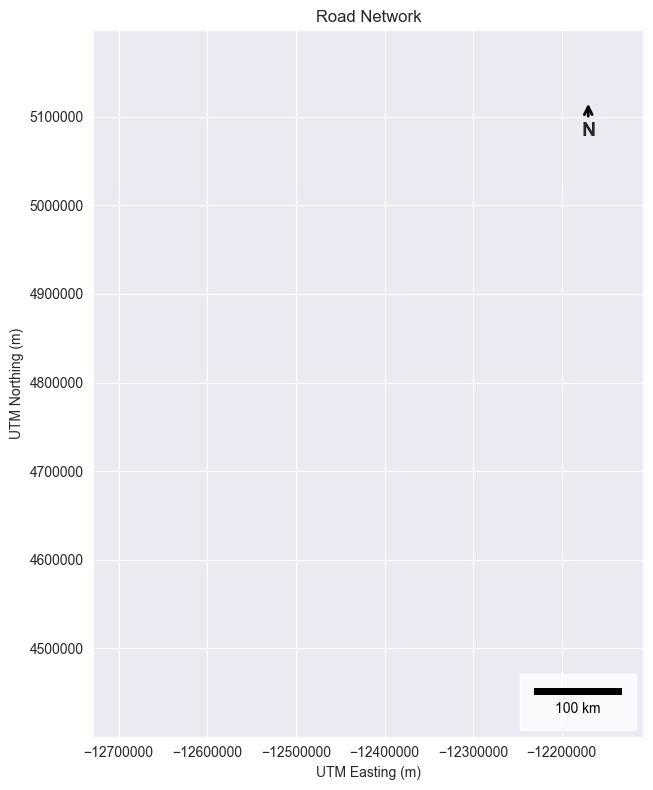

In [5]:
# =============================================================================
# 9. PLOTTING FUNCTION: BASIC MAP
# =============================================================================
# This function bundles all the necessary steps to turn a GeoDataFrame into
# a visual map using matplotlib.

def basic_shapefile(gdf):
    """
    Creates and displays a simple map from a given GeoDataFrame.

    This function sets up the plot, adds standard map elements like a title,
    north arrow, and scale bar, and then shows the final map.

    Args:
        gdf (GeoDataFrame): The GeoDataFrame you want to plot.
    """
    # This is the standard starting line for any plot. It creates two things:
    # 1. 'fig': The entire figure or window that will contain the plot.
    # 2. 'ax': The "axes" or the actual canvas inside the figure where we will
    #          draw our map. We can control things like titles and labels on 'ax'.
    # 'figsize=(12, 8)' sets the width and height of the plot in inches.
    fig, ax = plt.subplots(figsize=(12, 8))

    # This is the main geopandas plotting command. We tell our GeoDataFrame ('gdf')
    # to plot itself onto the canvas ('ax') we just created.
    # NOTE: 'alpha' controls transparency. An alpha of 0 is completely
    # transparent, and 1 is completely opaque. Setting it to 0 here means
    # the shapes themselves will be invisible, which is unusual but might be
    # intended if you only want to see the outline or plot something else on top later.
    gdf.plot(ax=ax, alpha=0,
             legend=True,        # Tries to add a legend to the map.
             categorical=True)   # Treats the data as separate categories for coloring.

    # --- CUSTOMIZE THE PLOT ---
    # The following lines add professional touches to our map.

    # Sets the main title that appears above the map.
    ax.set_title('Road Network')
    # Sets the label for the horizontal x-axis. "UTM Easting" is a type of map coordinate.
    ax.set_xlabel('UTM Easting (m)')
    # Sets the label for the vertical y-axis. "UTM Northing" is a type of map coordinate.
    ax.set_ylabel('UTM Northing (m)')

    # This forces the axis numbers to be displayed as regular numbers
    # (e.g., 450000) instead of scientific notation (e.g., 4.5e+5).
    ax.ticklabel_format(style='plain')

    # This calls our custom function from earlier to add a north arrow to the plot.
    add_north_arrow(ax)

    # Here we create a scale bar object.
    # We tell it that 1 unit in our data equals 1 "m" (meter).
    # We also define its location, colors, and size.
    scalebar = ScaleBar(1, "m", location="lower right",
           color="black", box_color="white", box_alpha=0.8,
           pad=1.0, border_pad=0.5, sep=5,
           length_fraction=0.2, font_properties={'size': 10})

    # After creating the scale bar, this line actually adds it to our plot.
    ax.add_artist(scalebar)

    # This command automatically adjusts plot elements to prevent labels from
    # overlapping or getting cut off. It's a great final touch.
    plt.tight_layout()

    # This is the final and most important command. It takes everything we've
    # prepared and displays it in a pop-up window.
    plt.show()

# =============================================================================
# 10. USING THE PLOTTING FUNCTION
# =============================================================================

# This commented-out line is a template showing how you would call the function.
# Insert your gdf into this function
# basic_shapefile(your_gdf)

# --- Example ---
# Now, we execute the function using our 'gdf_roads' GeoDataFrame.
# This single line of code will run all the steps inside the function and
# generate our map of the Utah roads.
basic_shapefile(gdf_roads)

Categorical Graphic for Shapefile Including Labels. This does not assign any particular color to any particular value.

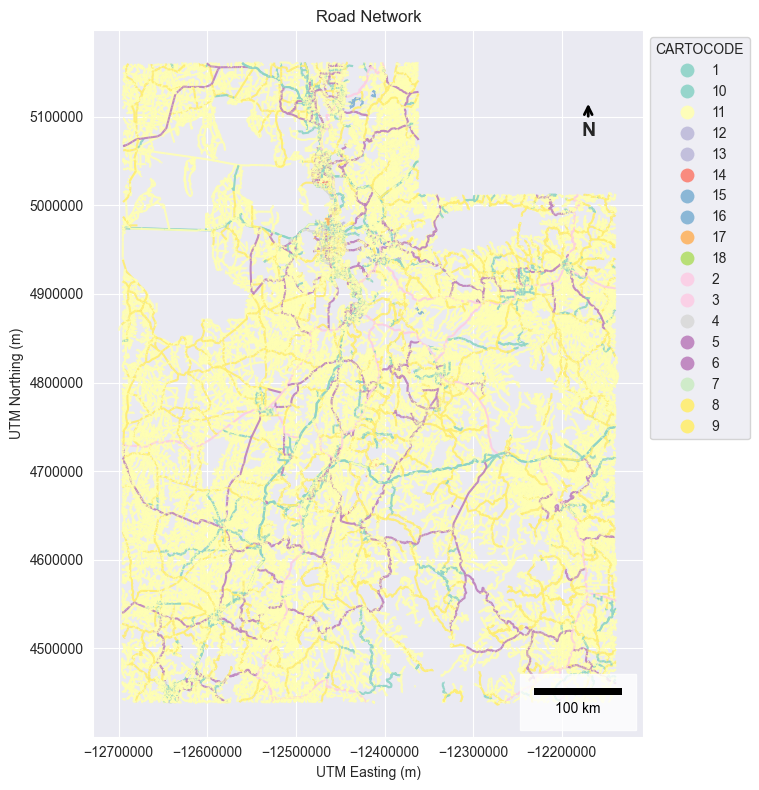

In [6]:
# =============================================================================
# 11. PLOTTING FUNCTION: ADVANCED MAP WITH LEGEND TITLE
# =============================================================================
# This version is nearly identical to the last one, but it includes one small
# but important improvement: it adds a title to the legend. This makes your
# map much easier for others to understand at a glance.

def advanced_shapefile_with_labels(gdf, column_label):
    """
    Creates and displays a categorical map with a titled legend.

    This function colors map features based on a specified column and
    adds a descriptive title to the legend, improving the map's clarity.

    Args:
        gdf (GeoDataFrame): The GeoDataFrame to plot.
        column_label (str): The name of the column to use for coloring the map.
                            This will also be used as the legend's title.
    """
    # Start by creating our figure (the window) and axes (the canvas).
    fig, ax = plt.subplots(figsize=(12, 8))

    # --- Changes from previous plot are in this section ---

    # As before, we make a new column with the data converted to strings
    # to ensure it's treated as distinct categories for coloring.
    new_label = f"{column_label}_str"
    gdf[new_label] = gdf[column_label].astype(str)

    # The plot command is the same, with one addition inside 'legend_kwds'.
    gdf.plot(ax=ax,
             column=new_label,
             alpha=0.9,
             legend=True,
             categorical=True,
             cmap='Set3',  # A good color scheme for categories.
             # 'legend_kwds' lets us customize the legend.
             legend_kwds={
                 # THIS IS THE NEW PART: We've added a 'title' key.
                 # It dynamically sets the legend's title to whatever string
                 # we passed in as the 'column_label'. So, if we use
                 # "CARTOCODE", the legend itself will have the title "CARTOCODE".
                 'title': column_label,
                 'loc': 'upper left',
                 'bbox_to_anchor': (1, 1) # Places legend outside the map.
             })

    # --- The rest of this function adds the standard map decorations ---
    # This part is identical to the previous functions.

    ax.set_title('Road Network')
    ax.set_xlabel('UTM Easting (m)')
    ax.set_ylabel('UTM Northing (m)')
    ax.ticklabel_format(style='plain')
    add_north_arrow(ax)
    scalebar = ScaleBar(1, "m", location="lower right",
           color="black", box_color="white", box_alpha=0.8,
           pad=1.0, border_pad=0.5, sep=5,
           length_fraction=0.2, font_properties={'size': 10})
    ax.add_artist(scalebar)
    plt.tight_layout()
    plt.show()


# =============================================================================
# 12. USING THE ADVANCED PLOTTING FUNCTION
# =============================================================================

# Template for using the function with your own data.
# Insert your gdf into this function
# advanced_shapefile_with_labels(your_gdf, "your column name")

# --- Example ---
# We call the function, telling it to color the roads by the "CARTOCODE" column.
# The resulting map's legend will now have "CARTOCODE" as its title.
advanced_shapefile_with_labels(gdf_roads, "CARTOCODE")

Advanced with specific categorical labeling

['#000000', '#FFFFFF', '#0173B2', '#DE8F05', '#CC78BC', '#029E73', '#FBAFE4', '#949494', '#56B4E9', '#E69F00', '#F0E442', '#D55E00', '#A0522D', '#800080', '#2F4F4F', '#FFB6C1', '#4682B4', '#DAA520', '#708090', '#B22222']


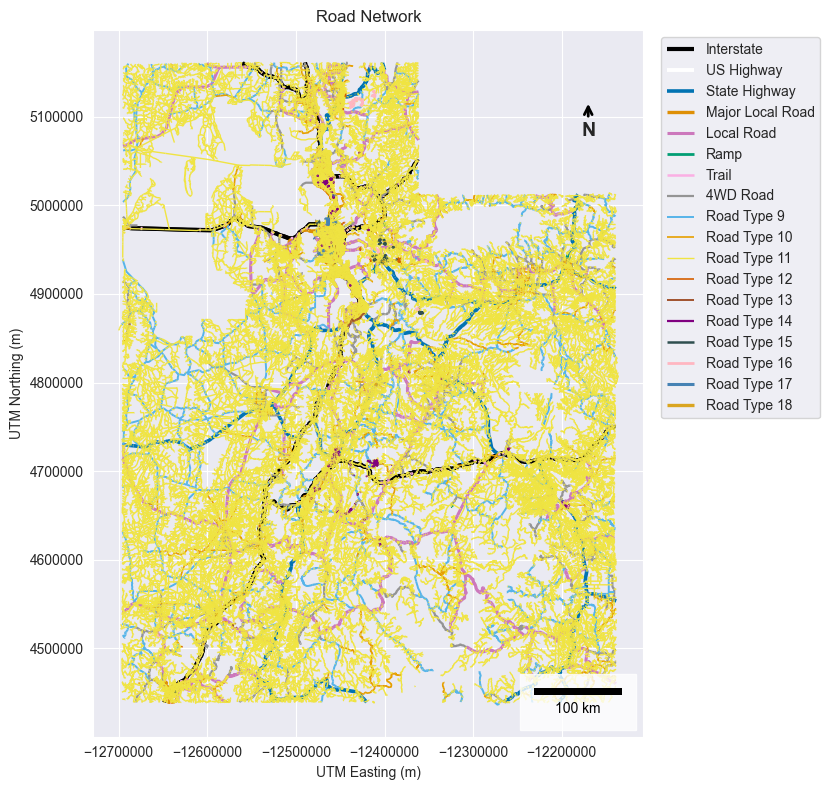

In [7]:
"""Column is whatever column you're using for graphics"""


# =============================================================================
# 13. PLOTTING FUNCTION: SPECIFIC MANUAL STYLING
# =============================================================================
# This is the most advanced and customizable plotting function yet. Instead of
# letting geopandas automatically assign colors with a 'cmap', this method
# defines a specific style (color, line width, etc.) for each category and then
# plots each category one by one. This gives you maximum control for creating
# publication-quality maps where every detail matters. 🎨

def advanced_shapefile_with_labels_specific(gdf, column_label):
    """
    Creates a highly customized map by plotting each data category manually
    with predefined styles.

    Args:
        gdf (GeoDataFrame): The GeoDataFrame to plot.
        column_label (str): The name of the column containing the categories.
                            (Note: In this specific function, 'CARTOCODE' is
                            hardcoded, but this argument is kept for consistency).
    """
    # Set up the figure and axes, our standard starting point.
    fig, ax = plt.subplots(figsize=(12, 8))

    # --- DEFINE CUSTOM STYLES ---
    # Here, we create a Python "dictionary" to hold our styling rules.
    # A dictionary stores information in key:value pairs.
    # The KEY is the road type number (e.g., 1).
    # The VALUE is another dictionary containing all the style rules for that key.
    # This lets us specify a unique color, line width, and legend label for each road type.
    print(colorblind_friendly_colors)
    road_styles = {
        1: {'color': colorblind_friendly_colors[0], 'linewidth': 3.0, 'label': 'Interstate'},
        2: {'color': colorblind_friendly_colors[1], 'linewidth': 2.8, 'label': 'US Highway'},
        3: {'color': colorblind_friendly_colors[2], 'linewidth': 2.6, 'label': 'State Highway'},
        4: {'color': colorblind_friendly_colors[3], 'linewidth': 2.4, 'label': 'Major Local Road'},
        5: {'color': colorblind_friendly_colors[4], 'linewidth': 2.2, 'label': 'Local Road'},
        6: {'color': colorblind_friendly_colors[5], 'linewidth': 2.0, 'label': 'Ramp'},
        7: {'color': colorblind_friendly_colors[6], 'linewidth': 1.8, 'label': 'Trail'},
        8: {'color': colorblind_friendly_colors[7], 'linewidth': 1.6, 'label': '4WD Road'},
        9: {'color': colorblind_friendly_colors[8], 'linewidth': 1.4, 'label': 'Road Type 9'},
        10: {'color': colorblind_friendly_colors[9], 'linewidth': 1.2, 'label': 'Road Type 10'},
        11: {'color': colorblind_friendly_colors[10], 'linewidth': 1.0, 'label': 'Road Type 11'},
        12: {'color': colorblind_friendly_colors[11], 'linewidth': 1.2, 'label': 'Road Type 12'},
        13: {'color': colorblind_friendly_colors[12], 'linewidth': 1.4, 'label': 'Road Type 13'},
        14: {'color': colorblind_friendly_colors[13], 'linewidth': 1.6, 'label': 'Road Type 14'},
        15: {'color': colorblind_friendly_colors[14], 'linewidth': 1.8, 'label': 'Road Type 15'},
        16: {'color': colorblind_friendly_colors[15], 'linewidth': 2.0, 'label': 'Road Type 16'},
        17: {'color': colorblind_friendly_colors[16], 'linewidth': 2.2, 'label': 'Road Type 17'},
        18: {'color': colorblind_friendly_colors[17], 'linewidth': 2.4, 'label': 'Road Type 18'}
    }

    # --- PLOT EACH CATEGORY IN A LOOP ---
    # This "for loop" iterates through every key-value pair in our road_styles dictionary.
    # On each pass, 'road_type' will be the number (e.g., 1) and 'style' will be the
    # dictionary of rules (e.g., {'color':..., 'linewidth':...}).
    for road_type, style in road_styles.items():
        # This is the magic of filtering! We create a temporary 'subset' GeoDataFrame
        # that contains ONLY the roads where the 'CARTOCODE' column matches the
        # current 'road_type' from the loop.
        subset = gdf[gdf[column_label] == str(road_type)]

        # This is a safety check. If a certain road type doesn't exist in our
        # data, the subset will be empty, and we should skip trying to plot it.
        if not subset.empty:
            # We plot ONLY the subset of data. The '**style' is a shortcut that
            # "unpacks" our style dictionary into the plot command. For road_type 1,
            # this is the same as writing:
            # plot(ax=ax, color='...', linewidth=3.0, label='...')
            subset.plot(ax=ax, **style)

    # --- FINALIZE THE PLOT ---
    # After the loop has plotted all the road types, we add the final touches.

    # This command collects all the 'label's we defined and builds the legend.
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

    # The rest of these commands are the same as before, adding our standard
    # map elements like the title, labels, north arrow, and scale bar.
    ax.set_title('Road Network')
    ax.set_xlabel('UTM Easting (m)')
    ax.set_ylabel('UTM Northing (m)')
    ax.ticklabel_format(style='plain')
    add_north_arrow(ax)
    scalebar = ScaleBar(1, "m", location="lower right",
           color="black", box_color="white", box_alpha=0.8,
           pad=1.0, border_pad=0.5, sep=5,
           length_fraction=0.2, font_properties={'size': 10})
    ax.add_artist(scalebar)
    plt.tight_layout()
    plt.show()

# =============================================================================
# 14. USING THE SPECIFIC STYLING FUNCTION
# =============================================================================

# Template for using the function.
# advanced_shapefile_with_labels_specific(your_gdf, "your column name")

# --- Example ---
# We call the function on our roads data. It will now loop through each
# road type from 1 to 18, filter the data for that type, and plot it with
# the exact color and line width we specified in the 'road_styles' dictionary.
advanced_shapefile_with_labels_specific(gdf_roads, "CARTOCODE")

For multiple shapefiles on the same graphic but with no categories

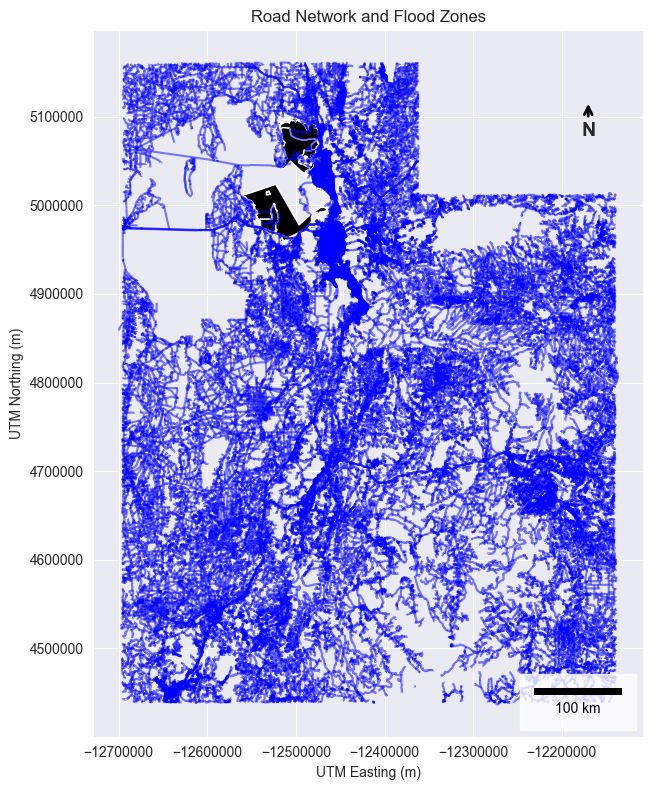

In [8]:
# Note the different alpha values

# =============================================================================
# 15. PLOTTING FUNCTION: MULTIPLE LAYERS
# =============================================================================
# A core concept in mapping is the use of layers. This function demonstrates
# how to plot two different GeoDataFrames on top of each other on the same map.
# Think of it like placing a transparent sheet with roads drawn on it over a
# base map showing flood zones. 🌊

def multiple_basic(gdf1, gdf2):
    """
    Creates and displays a map by overlaying two GeoDataFrames.

    Args:
        gdf1 (GeoDataFrame): The first dataset to plot (the bottom layer).
        gdf2 (GeoDataFrame): The second dataset to plot (the top layer).
    """
    # As always, we begin by creating our figure and the axes (our shared canvas).
    fig, ax = plt.subplots(figsize=(12, 8))

    # --- PLOT THE FIRST LAYER (BOTTOM) ---
    # We call the .plot() method on our first GeoDataFrame.
    gdf1.plot(ax=ax,          # Crucially, we tell it to draw on our canvas 'ax'.
              alpha=0.5,      # Set to 0.5 for semi-transparency.
              legend=True,
              color='blue',   # Manually set the color for this entire layer to blue.
              categorical=True)
    # --- PLOT THE SECOND LAYER (TOP) ---
    # Now, we call .plot() on our second GeoDataFrame. Because we pass it the
    # SAME axes ('ax'), it draws right on top of the first layer.
    gdf2.plot(ax=ax,          # Drawing on the same canvas is key!
              alpha=1,        # Set to 1 for fully opaque.
              legend=True,
              color='black',  # Manually set the color for this layer to black.
              categorical=True)
    # --- ADD STANDARD MAP DECORATIONS ---
    # The rest of the code is identical to previous functions. It adds the
    # title, labels, and other elements to our combined map.
    ax.set_title('Road Network and Flood Zones') # Title updated for context
    ax.set_xlabel('UTM Easting (m)')
    ax.set_ylabel('UTM Northing (m)')
    ax.ticklabel_format(style='plain')
    add_north_arrow(ax)
    scalebar = ScaleBar(1, "m", location="lower right",
           color="black", box_color="white", box_alpha=0.8,
           pad=1.0, border_pad=0.5, sep=5,
           length_fraction=0.2, font_properties={'size': 10})
    ax.add_artist(scalebar)
    plt.tight_layout()
    plt.show()


# =============================================================================
# 16. USING THE MULTIPLE LAYER FUNCTION
# =============================================================================

# A template showing how to call the function with your two datasets.
# Insert your gdf into this function
# multiple_basic(your_gdf, your_2nd_gdf)

# --- Example ---
# We call the function, passing the roads data as the first layer and the
# floods data as the second. This will produce a map showing the blue,
# semi-transparent roads overlaid by the solid black flood zones.
multiple_basic(gdf_roads, gdf_floods)

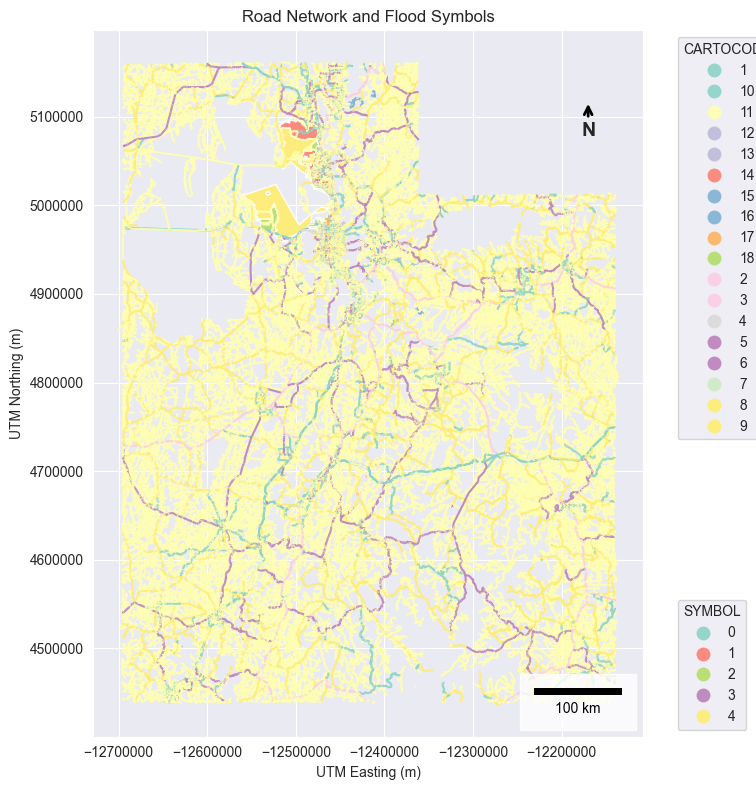

In [9]:
# =============================================================================
# 17. PLOTTING FUNCTION: MULTIPLE CATEGORICAL LAYERS WITH DUAL LEGENDS
# =============================================================================
# This is the most comprehensive function, combining layering and categorical
# coloring. It solves a common but tricky problem in Matplotlib: how to display
# a separate legend for each categorized layer on the same map. This requires a
# special trick to "save" the first legend before the second one is drawn.

def multiple_categories(gdf_1, column_label_1, gdf_2, column_label_2):
    """
    Overlays two categorized GeoDataFrames, each with its own legend.

    Args:
        gdf_1 (GeoDataFrame): The first dataset to plot.
        column_label_1 (str): The column in gdf_1 to use for its coloring.
        gdf_2 (GeoDataFrame): The second dataset to plot.
        column_label_2 (str): The column in gdf_2 to use for its coloring.
    """
    # Create our figure and the shared canvas (axes).
    fig, ax = plt.subplots(figsize=(12, 8))

    # --- PLOT THE FIRST LAYER AND "SAVE" ITS LEGEND ---

    # Prepare the data for the first layer by making a string version of the column.
    new_label_1 = f"{column_label_1}_str"
    gdf_1[new_label_1] = gdf_1[column_label_1].astype(str)

    # Plot the first layer, categorized and colored, with its legend outside
    # the top-right of the map.
    gdf_1.plot(ax=ax, column=new_label_1, alpha=0.9,
                   legend=True,
                   categorical=True,
                   cmap='Set3',
                   legend_kwds={'title': column_label_1, 'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)})

    # === THE FIRST PART OF THE TRICK ===
    # After the first plot is made, we immediately get its legend object
    # and store it in a variable called 'leg1'.
    leg1 = ax.get_legend()

    # --- PLOT THE SECOND LAYER ---

    # Prepare the data for the second layer.
    new_label_2 = f"{column_label_2}_str"
    gdf_2[new_label_2] = gdf_2[column_label_2].astype(str)

    # Now, we plot the second layer. When this command runs, Matplotlib's
    # default behavior is to REMOVE the first legend and replace it with this new one.
    gdf_2.plot(ax=ax, column=new_label_2, alpha=0.9,
                   legend=True,
                   categorical=True,
                   cmap='Set3',
                   legend_kwds={'title': column_label_2, 'loc': 'lower left', 'bbox_to_anchor': (1.05, 0.0)})

    # === THE SECOND PART OF THE TRICK ===
    # Because the first legend was removed, we now manually add it back to the plot
    # using the 'leg1' variable where we saved it. This makes it a permanent
    # "artist" on the canvas, allowing both legends to be displayed.
    ax.add_artist(leg1)

    # --- ADD STANDARD MAP DECORATIONS ---
    # The rest of the code adds the final map elements as before.
    ax.set_title('Road Network and Flood Symbols')
    ax.set_xlabel('UTM Easting (m)')
    ax.set_ylabel('UTM Northing (m)')
    ax.ticklabel_format(style='plain')
    add_north_arrow(ax)
    scalebar = ScaleBar(1, "m", location="lower right",
           color="black", box_color="white", box_alpha=0.8,
           pad=1.0, border_pad=0.5, sep=5,
           length_fraction=0.2, font_properties={'size': 10})
    ax.add_artist(scalebar)
    plt.tight_layout()
    plt.show()

# =============================================================================
# 18. USING THE DUAL-LEGEND FUNCTION
# =============================================================================

# A template showing how to call the function.
# multiple_categories(your_gdf1, "col1", your_gdf2, "col2")

# --- Example ---
# We call the function with both our datasets and their respective columns.
# The result will be a single map showing colored roads and colored flood zones,
# with two separate, clearly labeled legends on the right-hand side.
multiple_categories(gdf_roads,"CARTOCODE", gdf_floods, "SYMBOL")

Adding in Points

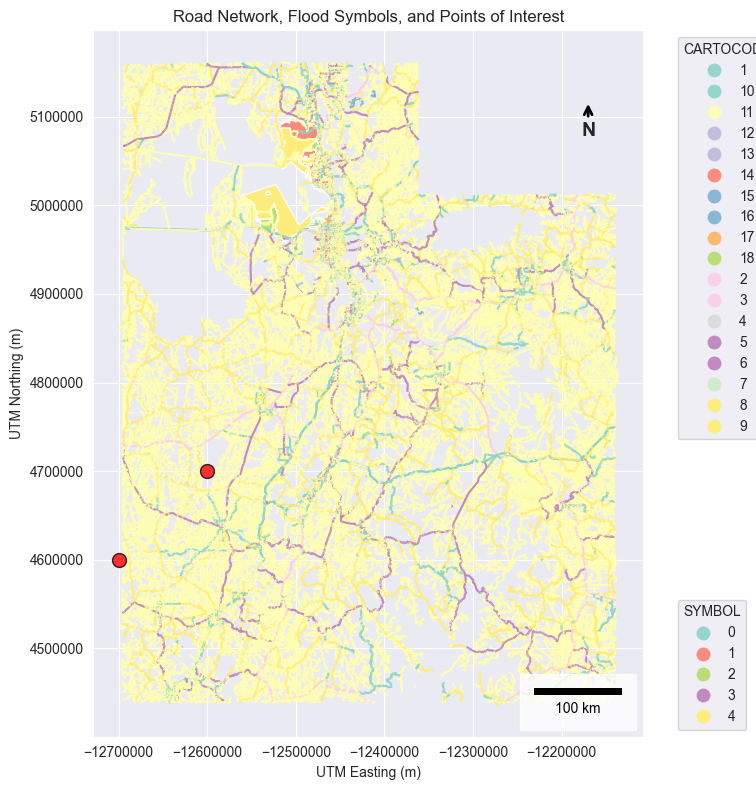

In [10]:
def multiple_categories_with_points(gdf_1, column_label_1, gdf_2, column_label_2, point_list, points_format):
    """
    Overlays two categorized GeoDataFrames and a list of points on a single map.

    Args:
        gdf_1 (GeoDataFrame): The first dataset.
        column_label_1 (str): The column in gdf_1 for categorical coloring.
        gdf_2 (GeoDataFrame): The second dataset.
        column_label_2 (str): The column in gdf_2 for categorical coloring.
        point_list (list): A list of tuples, where each tuple is an (x, y) coordinate pair.
        points_format (dict): A dictionary of styling rules for the points.
    """
    # Standard setup for the plot figure and axes.
    fig, ax = plt.subplots(figsize=(12, 8))

    # --- Plot GeoDataFrame Layers (Same as before) ---
    # This section for plotting the two GeoDataFrames and handling their
    # dual legends is identical to the previous function.
    new_label_1 = f"{column_label_1}_str"
    gdf_1[new_label_1] = gdf_1[column_label_1].astype(str)
    gdf_1.plot(ax=ax, column=new_label_1, alpha=0.9,
                   legend=True,
                   categorical=True,
                   cmap='Set3',
                   legend_kwds={'title': column_label_1, 'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)})
    leg1 = ax.get_legend()

    new_label_2 = f"{column_label_2}_str"
    gdf_2[new_label_2] = gdf_2[column_label_2].astype(str)
    gdf_2.plot(ax=ax, column=new_label_2, alpha=0.9,
                   legend=True,
                   categorical=True,
                   cmap='Set3',
                   legend_kwds={'title': column_label_2, 'loc': 'lower left', 'bbox_to_anchor': (1.05, 0.0)})
    ax.add_artist(leg1)

    # --- PLOT THE POINT DATA ---
    # This block checks if a list of points was actually provided.
    if point_list:
        # We use "list comprehension" to efficiently separate the x and y coordinates.
        # This line reads: "For each 'point' tuple in our point_list, take the first
        # element (index 0) and put it in a new list called x_coords."
        x_coords = [point[0] for point in point_list]

        # This does the same for the second element (index 1), the y-coordinate.
        y_coords = [point[1] for point in point_list]

        # 'ax.scatter' is the Matplotlib command for creating a scatter plot of points.
        # We give it our lists of x and y coordinates. The '**points_format' unpacks
        # our style dictionary, applying all the rules we defined below.
        ax.scatter(x_coords, y_coords,
                  **points_format)

    # --- ADD STANDARD MAP DECORATIONS ---
    ax.set_title('Road Network, Flood Symbols, and Points of Interest')
    ax.set_xlabel('UTM Easting (m)')
    ax.set_ylabel('UTM Northing (m)')
    ax.ticklabel_format(style='plain')
    add_north_arrow(ax)
    scalebar = ScaleBar(1, "m", location="lower right",
           color="black", box_color="white", box_alpha=0.8,
           pad=1.0, border_pad=0.5, sep=5,
           length_fraction=0.2, font_properties={'size': 10})
    ax.add_artist(scalebar)
    plt.tight_layout()
    plt.show()

# Create a list of points you want to plot. Each point is a tuple: (x-coordinate, y-coordinate).
points_lst = [(-12700000, 4600000), (-12600000, 4700000)]

# Create a dictionary to define exactly how the points should look.
points_style = {
    'color': 'red',          # Fill color of the markers.
    's': 100,                # Size of the markers.
    'marker': 'o',           # Shape of the markers ('o' for circle, '^' for triangle, etc.).
    'alpha': 0.8,            # Transparency of the markers.
    'edgecolor': 'black',    # Color of the marker's outline.
    'linewidth': 1,          # Width of the marker's outline.
    'label': 'Special Points', # Text for the legend (if a legend is created for it).
    'zorder': 5              # VERY IMPORTANT: This is the "stacking order." A higher zorder
                             # ensures these points are drawn ON TOP of the other map layers.
}

# --- Example ---
# Call the function with all the necessary pieces: two GeoDataFrames, their
# column labels, the list of points, and the style dictionary for the points.
multiple_categories_with_points(gdf_roads,"CARTOCODE", gdf_floods, "SYMBOL", points_lst, points_style)0